Pour information, j'ai ajouté des commentaires sont situés sur chaque bout de code.

1. Importer le dataset catfish 
2. Courbe de vente de poisson-chat

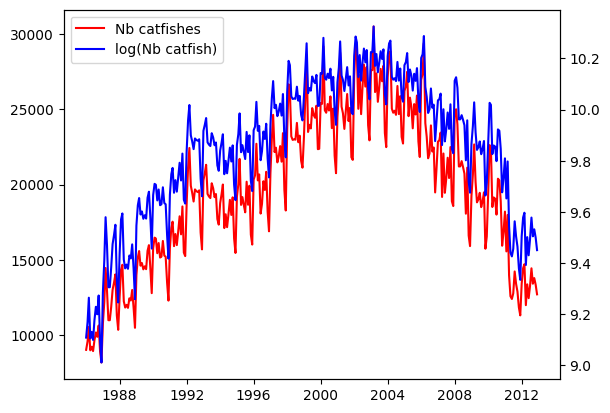

In [ ]:
import pandas
import numpy
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
import pmdarima as pm
from statistics import NormalDist

# Import du dataset
catfishes = pandas.read_csv('./data/catfish.csv', index_col=0, parse_dates=True)
catfishes.head()
catfishes.tail()

log_catfishes = numpy.log(catfishes)

# Création d'un graphique avec la série originale
g, ax = plt.subplots()
ln1 = ax.plot(catfishes, c='r', label='Nb catfishes')

# Création d'un graphique avec la série log en conservent le même axe des abscisses
ax2 = ax.twinx()
ln2 = ax2.plot(log_catfishes, c='b', label='log(Nb catfish)')

# Ajout de la légende
lns = ln1 + ln2
labels=[l.get_label() for l in lns]
ax.legend(lns, labels)


<Axes: xlabel='Date'>

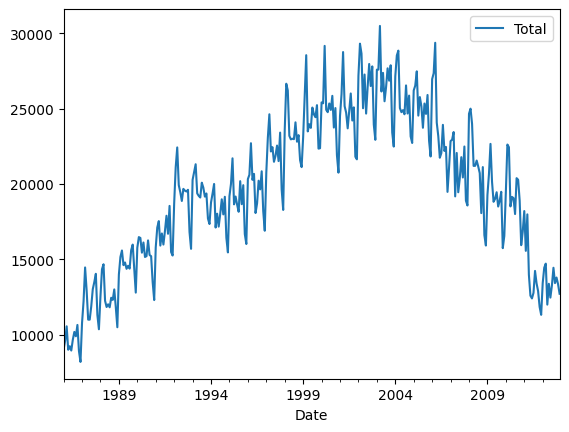

In [3]:
catfishes.plot()

3. Courbe de vente de 1996 à 2001

Text(0.5, 1.0, 'Vente de catfishes de 1996 à 2000')

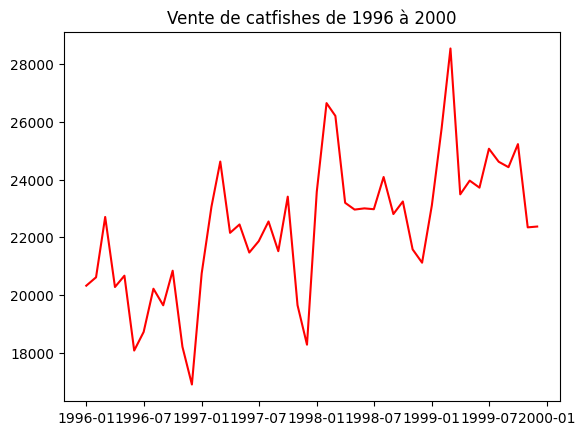

In [4]:
# Définir la courbe de vente de 1996 à 2000

catfishes_filtered = catfishes.loc['1996':'1999']
log_catfishes_filtered = numpy.log(catfishes_filtered)

# Création d'un graphique et ajout du titre de celui-ci avec la série originale
g, ax = plt.subplots()
ln1 = ax.plot(catfishes_filtered, c='r', label='Nb catfishes')
plt.title('Vente de catfishes de 1996 à 2000')

4. a. Moyenne des ventes sur l'année 1992

In [5]:
# Le .loc permet de définir l'année, le .mean de faire la moyenne

data_1992 = catfishes.loc['1992']
mean_sales_1992 = data_1992['Total'].mean()

mean_sales_1992

19278.0

4. b. Moyenne des ventes sur la décennie 90 (1990-1999)

In [6]:
# Le .loc permet de définir l'année, le .mean de faire la moyenne, le .round d'arrondir la somme

data_1992 = catfishes.loc['1990':'1999']
mean_sales_1992 = data_1992['Total'].mean().round()

mean_sales_1992

19702.0

4. c. Moyenne sur l'ensemble du dataset 

In [7]:
# Le .loc permet de définir l'année, le .mean de faire la moyenne, le .round d'arrondir

mean_sales_1992 = catfishes['Total'].mean().round()

mean_sales_1992

19644.0

5. a. Médiane des ventes sur l'année 1992

In [ ]:
# Le .loc permet de définir l'année, le .median de faire la médiane

data_1992 = catfishes.loc['1992']
mean_sales_1992 = data_1992['Total'].median()

mean_sales_1992

19529.5

5. b. Médiane sur la décennie 90 (1990-1999)

In [ ]:
# Le .loc permet de définir l'année, le .median de faire la médiane, le .round d'arrondir la somme

data_1992 = catfishes.loc['1990':'1999']
mean_sales_1992 = data_1992['Total'].median().round()

mean_sales_1992

19477.0

5. c. Médiane sur l'ensemble du dataset

In [ ]:
# Le .loc permet de définir l'année, le .median de faire la médiane, le .round d'arrondir

mean_sales_1992 = catfishes['Total'].median().round()

mean_sales_1992

19660.0

6. a. Mode de ventes sur l'année 1992

In [ ]:
# Le .loc permet de définir l'année, le .mode de faire la mode

data_1992 = catfishes.loc['1992']
mean_sales_1992 = data_1992['Total'].mode()

mean_sales_1992

0     15698
1     16814
2     18698
3     18874
4     19454
5     19500
6     19559
7     19615
8     19676
9     19923
10    21100
11    22425
Name: Total, dtype: int64

6. b. Mode de ventes sur la décennie 1990

In [ ]:
# Le .loc permet de définir l'année, le .mode de faire la mode, le .round d'arrondir la somme

data_1992 = catfishes.loc['1990':'1999']
mean_sales_1992 = data_1992['Total'].mode().round()

mean_sales_1992

0      12300
1      13488
2      15158
3      15212
4      15214
       ...  
115    25229
116    25780
117    26207
118    26650
119    28544
Name: Total, Length: 120, dtype: int64

6. c. Mode de ventes sur l'ensemble du dataset

In [ ]:
# Le .loc permet de définir l'année, le .mode de faire la mode, le .round d'arrondir la somme

mean_sales_1992 = catfishes['Total'].mode().round()

mean_sales_1992

0    15158
1    18204
2    19451
Name: Total, dtype: int64

7. a. Ecart type sur l'année 1992

In [ ]:
# Le .loc permet de définir l'année, 
# le .std de calculer l'écart type, 
# le .round(2) d'arrondir la somme à 2 chiffres après la virgule

data_1992 = catfishes.loc['1992']
mean_sales_1992 = data_1992['Total'].std().round(2)

mean_sales_1992

1744.02

7.b Ecart type sur la décennie 1990

7. b. Ecart type sur la décennie 1990

In [ ]:
# Le .loc permet de définir l'année, 
# le .std de calculer l'écart type, 
# le .round(2) d'arrondir la somme à 2 chiffres après la virgule

data_1992 = catfishes.loc['1990':'1999']
mean_sales_1992 = data_1992['Total'].std().round(2)

mean_sales_1992

3063.1

7. c. Ecart type sur l'ensemble du dataset

In [ ]:
# Le .loc permet de définir l'année, 
# le .std de calculer l'écart type, 
# le .round d'arrondir la somme

mean_sales_1992 = catfishes['Total'].std().round()

mean_sales_1992

5039.0

8. La série est-elle stationnaire ?

Un processus est stationnaire lorsque E(yt) = u, V(yt) = o², y(t,8) = y(t-s) où y est la fonction d'autocorrélation.
En d'autres termes, une série est stationnaire lorsque sa moyenne reste stable en fonction du temps et n'augmente pas. 
Or, on voit bien ici sur cette série que la moyenne augmente. Ce n'est donc pas une série stationnaire.

9. La série comporte-t-elle une saisonnalité ?

Pour rappel, la saisonnalité désigne les tendances hebdomadaires, mensuelles, trimestrielles ou annuelles. 
Selon cette définition et selon le schéma de ventes, on remarque qu'il y a bien un schéma annuel qui se répète. En effet, le début d'année est conclué par de fortes ventes tandis que la fin d'année est plus compliquée.

Comparons les pics et les creux par année :
- 1986 :
    Pic : mars (10558) ou octobre (10649)
    Creux : décembre (8196)
- 1987 : 
    Pic : mars (14463)
    Creux : décembre (10362)
- 1988 :
    Pic : mars (14676)
    Creux : décembre (10496)
- 1995 :
    Pic : mars (21702)
    Creux : décembre (16018)
- 2000 :
    Pic : mars (29161)
    Creux : décembre (20752)
- 2005 :
    Pic : mars (27473)
    Creux : décembre (21825)
- 2009 :
    Pic : mars (22660)
    Creux : décembre (16554)
- 2011 :
    Pic : mars (17984)
    Creux : décembre (11321)

Globalement, nous pouvons conclure que la période de pic se réalise quasiment systématiquement en mars, et que la période de creux quant à elle en décembre. 
La série comporte donc une saisonnalité.

10. La série présente-t-elle une tendance ?

Une tendance est une moyenne qui peut être progressive et régressive sur une période considérée.

Ici, il y a une forte progression de 1986 à 1990. Les ventes passent d'environ 9500 à 22500. 
Durant les années 2000–2005, cela varie souvent entre 20 000 et 30 000, avec des variations marquées.
À partir de 2006–2007, on constate une baisse (jusqu'à 20 000).
Entre 2011 et 2012, les valeurs mensuelles fluctuent 11 000 et 15 000. Il y a donc eu une baisse.

La série ne suit alors pas une seule tendance linéaire simple. En effet, elle progresse au début (1986–1990), stagne autour des années 2000-2003 et régresse par la suite. Il y a plusieurs phases de tendance ou de changements de régime.

Pour conclure, d'après les chiffres récemment citées, nous pouvons constater qu'il y a donc eu plusieurs tendances mais qui ne sont pas forcément unique ni linéaire. Elles comportent plutôt des phases de progression et régression, confirmant qu’elle n’est pas stationnaire.


11. Modèle prédictif

In [1]:
# Séparer les données d'entraînement (1986-2000) et de test (2001-2012)
train = catfishes.loc['1986-01-01':'2000-12-31']
test = catfishes.loc['2001-01-01':'2012-12-31']

# Modèle Holt-Winters avec saisonnalité
model = ExponentialSmoothing(
    train['Total'],
    seasonal_periods=12,
    trend='add',
    seasonal='add',
    damped=True
)
model_fit = model.fit(optimized=True)

# Faire des prédictions
pred = model_fit.forecast(len(test))
pred_series = pd.Series(pred, index=test.index)

# Comparer les prédictions avec les valeurs réelles
plt.figure(figsize=(15, 7))
plt.plot(train.index, train['Total'], label='Entraînement (1986-2000)')
plt.plot(test.index, test['Total'], label='Données réelles (2001-2012)')
plt.plot(test.index, pred_series, label='Prédictions (2001-2012)')
plt.title('Comparaison des prédictions avec les données réelles')
plt.xlabel('Année')
plt.ylabel('Quantité vendue')
plt.legend()
plt.grid(True)
plt.show()

# Évaluer la performance du modèle
mae = np.mean(np.abs(test['Total'] - pred_series))
rmse = np.sqrt(np.mean((test['Total'] - pred_series)**2))
mape = np.mean(np.abs((test['Total'] - pred_series) / test['Total'])) * 100

print("\nÉvaluation du modèle Holt-Winters:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Square Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

NameError: name 'catfishes' is not defined

Critique de ce modèle : 

Les données sont divisées en jeu d’entraînement (1986-2000) et jeu de test (2001-2012).
Cela permet d’entraîner le modèle sur l’historique et de tester sa capacité à prédire les valeurs futures.

Ce modèle est utilisé pour les séries temporelles saisonnières avec tendance.
Il prend en compte une tendance additive (croissance ou décroissance dans le temps), une saisonnalité additive (périodicité de 12 mois ici), un facteur d’amortissement (damped=True), qui réduit progressivement l’effet de la tendance pour éviter des projections trop optimistes ou irréalistes.

Pour comparer, le modèle fait des prédictions sur la période de test (2001-2012).
Les prévisions sont comparées aux valeurs réelles à l’aide d’un graphique.

Trois métriques sont utilisées :
MAE (Mean Absolute Error) : Moyenne des erreurs absolues entre les prédictions et les valeurs réelles.
RMSE (Root Mean Square Error) : Mesure la dispersion des erreurs, pénalisant les erreurs importantes.
MAPE (Mean Absolute Percentage Error) : Indique l’erreur en pourcentage par rapport aux valeurs réelles.

Si les erreurs sont faibles (MAE, RMSE et MAPE bas), le modèle est performant.
Si elles sont élevées, cela peut signifier que la saisonnalité ou la tendance a changé après 2000 et que le modèle n’a pas su bien les capturer.

12. Modèle pmdarima

In [ ]:
print("\nRecherche du meilleur modèle ARIMA avec pmdarima:")
auto_arima = pm.auto_arima(
    train['Total'],
    seasonal=True,
    m=12,
    trace=True,
    suppress_warnings=True,
    stepwise=True,
    error_action="ignore"
)

print("\nMeilleur modèle ARIMA trouvé:")
print(auto_arima.summary())

# Prédictions avec le modèle ARIMA
arima_pred = auto_arima.predict(n_periods=len(test))
arima_pred_series = pd.Series(arima_pred, index=test.index)

# Comparer les prédictions ARIMA avec les valeurs réelles
plt.figure(figsize=(15, 7))
plt.plot(train.index, train['Total'], label='Entraînement (1986-2000)')
plt.plot(test.index, test['Total'], label='Données réelles (2001-2012)')
plt.plot(test.index, arima_pred_series, label='Prédictions ARIMA (2001-2012)')
plt.title('Comparaison des prédictions ARIMA avec les données réelles')
plt.xlabel('Année')
plt.ylabel('Quantité vendue')
plt.legend()
plt.grid(True)
plt.show()

# Évaluer la performance du modèle ARIMA
arima_mae = np.mean(np.abs(test['Total'] - arima_pred_series))
arima_rmse = np.sqrt(np.mean((test['Total'] - arima_pred_series)**2))
arima_mape = np.mean(np.abs((test['Total'] - arima_pred_series) / test['Total'])) * 100

print("\nÉvaluation du modèle ARIMA:")
print(f"MAE (Mean Absolute Error): {arima_mae:.2f}")
print(f"RMSE (Root Mean Square Error): {arima_rmse:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {arima_mape:.2f}%")

6. 2. Poisson-chat et loi normale

In [ ]:
print("\n6.2. Poisson-chat et loi normale")

# Créer une distribution normale avec μ=25 et σ=7.5
distribution = NormalDist(mu=25, sigma=7.5)

# 1. Probabilité qu'un poisson ait une taille entre 10 et 25 cm
proba_10_25 = distribution.cdf(25) - distribution.cdf(10)
print(f"1. Probabilité qu'un poisson ait une taille entre 10 et 25 cm: {proba_10_25:.3f}")

# 2. Probabilité qu'un poisson ait une taille inférieure à 25 cm
proba_moins_25 = distribution.cdf(25)
print(f"2. Probabilité qu'un poisson ait une taille inférieure à 25 cm: {proba_moins_25:.3f}")

# 3. Probabilité qu'un poisson ait une taille supérieure à 30 cm
proba_plus_30 = 1 - distribution.cdf(30)
print(f"3. Probabilité qu'un poisson ait une taille supérieure à 30 cm: {proba_plus_30:.3f}")